In [1]:
import cv2
import numpy as np

In [2]:
## Detect keypoints and compute their descriptors in a single step
img_1 = cv2.imread("1.png")
img_2 = cv2.imread("2.png")

# Keypoints and their descriptors
keypoints_1, keypoints_2 = [], []
descriptors_1, descriptors_2 = [], []

orb = cv2.ORB_create()

keypoints_1, descriptors_1 = orb.detectAndCompute(img_1, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(img_2, None)

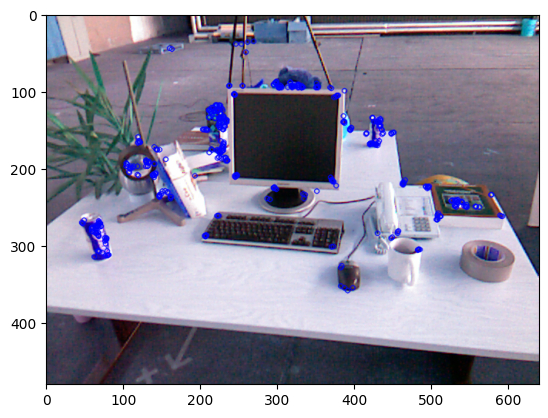

In [19]:
## Show the output image with keypoints
import matplotlib.pyplot as plt

# drawKeypoints function is used to draw keypoints
output_image = cv2.drawKeypoints(img_1, keypoints_1, 0, (0, 0, 255),
                                 flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
  
# displaying the image with keypoints as the
# output on the screen
plt.imshow(output_image)
  
# plotting image
plt.show()

In [20]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(descriptors_1, descriptors_2)

# Sort and remove outliers
matches = sorted(matches, key = lambda x: x.distance)

min_dist = matches[0].distance
max_dist = matches[len(matches) - 1].distance

print(f"Min dist: {min_dist}, Max dist: {max_dist}")

good_matches = []

for i in range(descriptors_1.shape[0]):
    if matches[i].distance <= max(2 * min_dist, 30.0):
        good_matches.append(matches[i])

img_match = cv2.drawMatches(img_1, keypoints_1, img_2, keypoints_2, matches, None)
img_goodmatch = cv2.drawMatches(img_1, keypoints_1, img_2, keypoints_2, good_matches, None)

cv2.imshow("all matches", img_match)
cv2.waitKey(0)

cv2.imshow('good matches', img_goodmatch)
cv2.waitKey(0)
  
# closing all open windows
cv2.destroyAllWindows()

Min dist: 4.0, Max dist: 94.0
